<a href="https://colab.research.google.com/github/Sha-98/Data-Science-Masters/blob/main/Statistics_Adv_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistics Advance 06 - Assignment**

## **Q1. Write a Python function that takes in two arrays of data and calculates the F-value for a variance ratio test. The function should return the F-value and the corresponding p-value for the test.**


In [14]:
import numpy as np
from scipy.stats import f_oneway

def f_test(data1, data2):

  # calculate the f-stats and p-value
  f_stats, p_value = f_oneway(data1, data1)

  return f_stats, p_value

data1 = np.random.normal(loc=5, scale=2, size=100)
data2 = np.random.normal(loc=7, scale=2, size=100)

# calling the function
f_statistics, p_value = f_test(data1, data2)
print(f"The f_stats: {f_statistics}")
print(f"The p_value: {p_value}")

The f_stats: 9.909660149264978e-31
The p_value: 1.0


## **Q2. Given a significance level of 0.05 and the degrees of freedom for the numerator and denominator of an F-distribution, write a Python function that returns the critical F-value for a two-tailed test.**


In [13]:
from scipy.stats import f

def critical_f_value(df_num, df_denom, alpha=0.05):
    # Calculate the critical F-value
    critical_value = f.ppf(1 - alpha / 2, df_num, df_denom)

    return critical_value

# Example usage:
df_num = 3  # Degrees of freedom for the numerator
df_denom = 20  # Degrees of freedom for the denominator
alpha = 0.05  # Significance level

critical_f = critical_f_value(df_num, df_denom, alpha)
print(f"Critical F-value: {critical_f}")

Critical F-value: 3.8586986662732143


## **Q3. Write a Python program that generates random samples from two normal distributions with known variances and uses an F-test to determine if the variances are equal. The program should output the F-value, degrees of freedom, and p-value for the test.**



In [15]:
import numpy as np
from scipy.stats import f

def f_test_for_variances(sample1, sample2):
    # Calculate the variances
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)

    # Calculate the F-statistic
    f_statistic = var1 / var2 if var1 > var2 else var2 / var1

    # Degrees of freedom
    df_num = len(sample1) - 1
    df_denom = len(sample2) - 1

    # Calculate p-value
    p_value = 2 * min(f.cdf(f_statistic, df_num, df_denom), 1 - f.cdf(f_statistic, df_num, df_denom))

    return f_statistic, df_num, df_denom, p_value

# Generate random samples from normal distributions with known variances
np.random.seed(42)
sample1 = np.random.normal(loc=0, scale=1, size=100)
sample2 = np.random.normal(loc=0, scale=1.5, size=100)

# Perform F-test
f_statistic, df_num, df_denom, p_value = f_test_for_variances(sample1, sample2)

# Output the results
print(f"F-statistic: {f_statistic}")
print(f"Degrees of freedom (numerator): {df_num}")
print(f"Degrees of freedom (denominator): {df_denom}")
print(f"P-value: {p_value}")

F-statistic: 2.4811042864087605
Degrees of freedom (numerator): 99
Degrees of freedom (denominator): 99
P-value: 9.191624675830568e-06


## **Q4.The variances of two populations are known to be 10 and 15. A sample of 12 observations is taken from each population. Conduct an F-test at the 5% significance level to determine if the variances are significantly different.**


**1. Define the hypotheses:**

- Null Hypothesis (H0): The variances of the two populations are equal.
- Alternative Hypothesis (H1): The variances of the two populations are not equal.

**2. Set the significance level (α):**

- In this case, the significance level is given as 5%, which corresponds to α = 0.05.

**3. Identify the degrees of freedom:**

- The degrees of freedom for the numerator (df_num) is the sample size of the first population minus 1.
- The degrees of freedom for the denominator (df_denom) is the sample size of the second population minus 1.

**4. Calculate the F-statistic:**

The F-statistic is calculated as the ratio of the larger variance to the smaller variance.

**5. Determine the critical F-value:**

- Using the degrees of freedom, find the critical F-value from an F-table or use statistical software.

**6. Compare the F-statistic with the critical F-value:**
- If the F-statistic is greater than the critical F-value, reject the null hypothesis.

In [17]:
import scipy.stats as stats

# Given data
variance1 = 10
variance2 = 15
sample_size1 = 12
sample_size2 = 12
alpha = 0.05

# Degrees of freedom
df_num = sample_size1 - 1
df_denom = sample_size2 - 1

# Calculate the F-statistic
f_statistic = variance1 / variance2 if variance1 > variance2 else variance2 / variance1

# Critical F-value
critical_f_value = stats.f.ppf(1 - alpha / 2, df_num, df_denom)

# Compare F-statistic with critical F-value
reject_null = f_statistic > critical_f_value

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"Critical F-value: {critical_f_value}")
print(f"Reject the null hypothesis? {'Yes' if reject_null else 'No, We Fail to Reject the Null Hypothesis'}")

F-statistic: 1.5
Critical F-value: 3.473699051085809
Reject the null hypothesis? No, We Fail to Reject the Null Hypothesis


## **Q5. A manufacturer claims that the variance of the diameter of a certain product is 0.005. A sample of 25 products is taken, and the sample variance is found to be 0.006. Conduct an F-test at the 1% significance level to determine if the claim is justified.**


**1. Define the hypotheses:**

- Null Hypothesis (H0): The variance of the population is equal to the claimed variance (σ² = 0.005).
- Alternative Hypothesis (H1): The variance of the population is not equal to the claimed variance (σ² ≠ 0.005).

**2. Set the significance level (α):**

- In this case, the significance level is given as 1%, which corresponds to α = 0.01.

**3. Identify the degrees of freedom:**

-  Degrees of freedom for the numerator (df_num) is the sample size minus 1.
- Degrees of freedom for the denominator (df_denom) is the degrees of freedom for the claimed variance.

**4. Calculate the F-statistic:**

- The F-statistic is calculated as the ratio of the sample variance to the claimed variance.

**5. Determine the critical F-value:**

- Using the degrees of freedom, find the critical F-value from an F-table or use statistical software.

**6. Compare the F-statistic with the critical F-value:**

- If the F-statistic is greater than the critical F-value or less than its reciprocal, reject the null hypothesis.

In [18]:
import scipy.stats as stats

# Given data
claimed_variance = 0.005
sample_variance = 0.006
sample_size = 25
alpha = 0.01

# Degrees of freedom
df_num = sample_size - 1
df_denom = df_num

# Calculate the F-statistic
f_statistic = sample_variance / claimed_variance

# Critical F-value
critical_f_value_lower = stats.f.ppf(alpha / 2, df_num, df_denom)
critical_f_value_upper = stats.f.ppf(1 - alpha / 2, df_num, df_denom)

# Compare F-statistic with critical F-values
reject_null = f_statistic < critical_f_value_lower or f_statistic > critical_f_value_upper

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"Critical F-values: {critical_f_value_lower}, {critical_f_value_upper}")
print(f"Reject the null hypothesis? {'Yes' if reject_null else 'No, We Fail to Reject the Null Hypothesis'}")

F-statistic: 1.2
Critical F-values: 0.3370701342685674, 2.966741631292762
Reject the null hypothesis? No, We Fail to Reject the Null Hypothesis


## **Q6. Write a Python function that takes in the degrees of freedom for the numerator and denominator of an F-distribution and calculates the mean and variance of the distribution. The function should return the mean and variance as a tuple.**


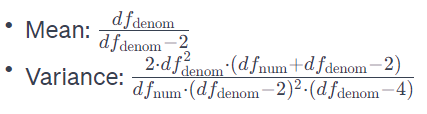

In [19]:
import scipy.stats as stats

def f_distribution_mean_and_variance(df_num, df_denom):
    # Calculate mean and variance of F-distribution
    mean = df_denom / (df_denom - 2)
    variance_numerator = 2 * (df_denom**2) * (df_num + df_denom - 2)
    variance_denominator = df_num * (df_denom - 2)**2 * (df_denom - 4)
    variance = variance_numerator / variance_denominator

    return mean, variance

# Example usage:
df_num_example = 5
df_denom_example = 10

mean, variance = f_distribution_mean_and_variance(df_num_example, df_denom_example)

print(f"Mean of F-distribution: {mean}")
print(f"Variance of F-distribution: {variance}")

Mean of F-distribution: 1.25
Variance of F-distribution: 1.3541666666666667


## **Q7. A random sample of 10 measurements is taken from a normal population with unknown variance. The sample variance is found to be 25. Another random sample of 15 measurements is taken from another normal population with unknown variance, and the sample variance is found to be 20. Conduct an F-test at the 10% significance level to determine if the variances are significantly different.**


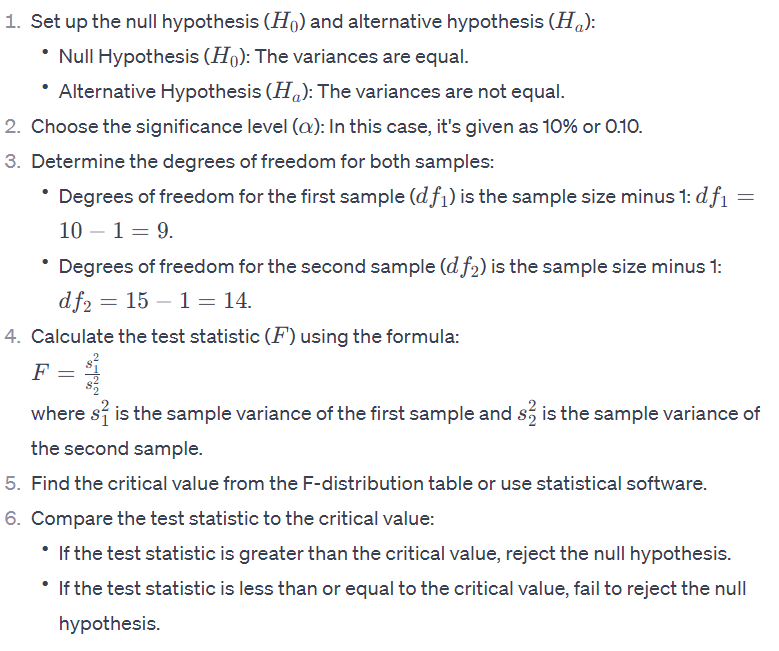

In [20]:
import scipy.stats as stats

# Given data
alpha = 0.10
sample_var1 = 25
sample_var2 = 20
df1 = 9
df2 = 14

# Calculate the test statistic
test_statistic = sample_var1 / sample_var2

# Find the critical value
critical_value = stats.f.ppf(1 - alpha/2, df1, df2)

# Compare the test statistic to the critical value
if test_statistic > critical_value:
    print("Reject the null hypothesis. Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis. Variances are not significantly different.")

Fail to reject the null hypothesis. Variances are not significantly different.


## **Q8. The following data represent the waiting times in minutes at two different restaurants on a Saturday night:**

## **Restaurant A: 24, 25, 28, 23, 22, 20, 27;**

## **Restaurant B: 31, 33, 35, 30, 32, 36.**

## **Conduct an F-test at the 5% significance level to determine if the variances are significantly different.**


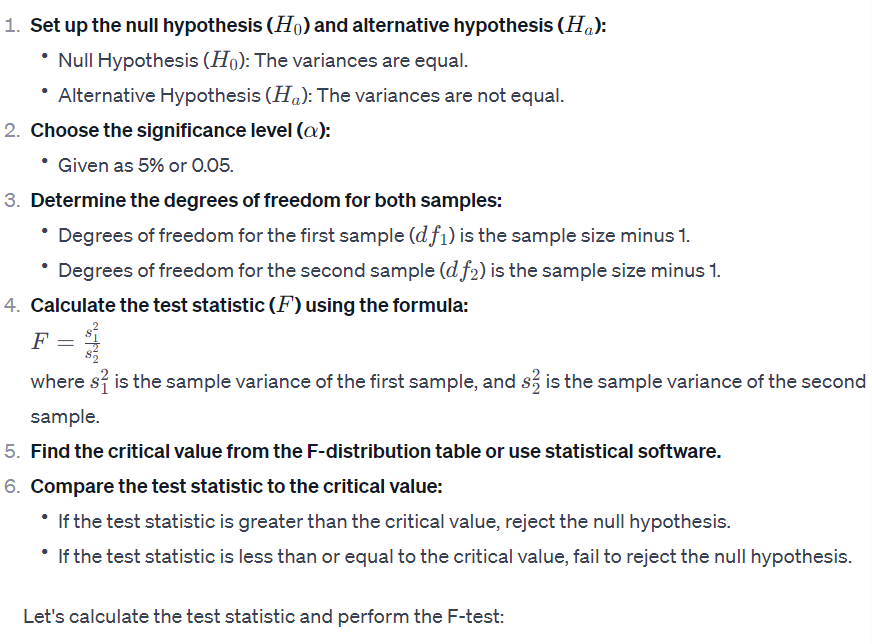

In [21]:
import scipy.stats as stats

# Given data
alpha = 0.05
data_A = [24, 25, 28, 23, 22, 20, 27]
data_B = [31, 33, 35, 30, 32, 36]

# Degrees of freedom
df1 = len(data_A) - 1
df2 = len(data_B) - 1

# Sample variances
variance_A = sum((x - sum(data_A)/len(data_A))**2 for x in data_A) / df1
variance_B = sum((x - sum(data_B)/len(data_B))**2 for x in data_B) / df2

# Calculate the test statistic
test_statistic = variance_A / variance_B

# Find the critical value
critical_value = stats.f.ppf(1 - alpha/2, df1, df2)

# Compare the test statistic to the critical value
if test_statistic > critical_value:
    print("Reject the null hypothesis. Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis. Variances are not significantly different.")

Fail to reject the null hypothesis. Variances are not significantly different.


## **Q9. The following data represent the test scores of two groups of students:**

## **Group A: 80, 85, 90, 92, 87, 83;**

## **Group B: 75, 78, 82, 79, 81, 84.**

## **Conduct an F-test at the 1% significance level to determine if the variances are significantly different.**

In [22]:
import scipy.stats as stats

# Given data
alpha = 0.01
group_A = [80, 85, 90, 92, 87, 83]
group_B = [75, 78, 82, 79, 81, 84]

# Degrees of freedom
df1 = len(group_A) - 1
df2 = len(group_B) - 1

# Sample variances
variance_A = sum((x - sum(group_A)/len(group_A))**2 for x in group_A) / df1
variance_B = sum((x - sum(group_B)/len(group_B))**2 for x in group_B) / df2

# Calculate the test statistic
test_statistic = variance_A / variance_B

# Find the critical value
critical_value = stats.f.ppf(1 - alpha/2, df1, df2)

# Compare the test statistic to the critical value
if test_statistic > critical_value:
    print("Reject the null hypothesis. Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis. Variances are not significantly different.")

Fail to reject the null hypothesis. Variances are not significantly different.
